# Girls Generation 假設每筆只有賣一張
- <font color="red">自我觀察</font>：
    - member 可以搶先買，非member搶剩下的票
    - 演唱會區域的錢不會因為member 與 非member 而有差別（兩者唯一優勢差在於時間）
    - 定義銷售速度：銷售量下降比例 / 時間變化量 （member 與 非 member 分別來看，因為兩者購票時間有大的落差，購票時間不同）
    - 代表斜率越大越好，銷售速度越快
    - 演唱會員買得到預售票？
    - 一種位置會有一種或兩種價位
<br><br>
- <font color="Blue">自定義的DataFrame：</font>df，data，final，member，result
    - df 讀入的檔案
    - data 我們要的特徵DataFrame
    - member 包含member與非memner最大值最小值的DataFrame
    - final 取我們要的指標而形成的DataFrame
    - result 更精準的DataFrame
<br><br>
- IDENTITY The identity card ID for the person that made the purchase, the last three numbers have been deleted for the sake of customer privacy.
<br><br>
- CREATE_DATE The time when the person made the purchase.(This part should require some cleaning, as it would record 16:00 as 4 p.m., thus we should delete the p.m. and add 12 hours to the timeline that has p.m. in them).
<br><br>
- T_STANDARD_TICKET_TYPE_NAME Indicating whether that person is a member of the ticket system or not.
<br><br>
- SEAT_REGION_NAME Stating the seat section in the Arena for the purchased ticket.
<br><br>
- SEX Quite straightforward, the person's gender.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime as dt
pd.options.display.max_columns=50
pd.options.display.max_rows=30
import re
import cufflinks as cf
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot,plot,download_plotlyjs

In [3]:
cf.go_offline(connected=True)

# 1. Data Preprocessing ( 引入檔案，特徵工程 ) 

In [12]:
# 讀入檔案，讀取檔案所在路徑
sys=pd.read_csv("system1-4utf8[1].csv")
df=pd.read_csv("girlgeneration(utf8).csv")

In [13]:
df.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,TICKET_BOOTH_RUNNING_NUM,PRICE,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_SHIPPING_RATE_ID,TICKET_FEE,SHIPPING_ZIP1,SHIPPING_COUNTRY_ID1,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS
0,331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,41139,1800,non-member,Floor3Sectionyellow3I,1,11.0,10.0,4,50,114.0,1,10,NaN,5,61,300.0,26237,0,male,2103
1,332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,41138,1800,non-member,Floor3Sectionyellow3I,1,11.0,11.0,4,50,114.0,1,10,NaN,5,61,300.0,26237,0,male,2103
2,378,24923,46903,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,39579,1800,member,Floor3Sectionyellow3C,1,25.0,7.0,2,50,434.0,10,129,NaN,10,129,434.0,24923,0,male,2682
3,379,24923,46902,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,39580,1800,member,Floor3Sectionyellow3C,1,25.0,6.0,2,50,434.0,10,129,NaN,10,129,434.0,24923,0,male,2682
4,586,24930,46919,4,C12101,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:28:56.,2010/10/17,15:00,39596,1800,member,Floor3Sectionyellow3C,1,19.0,3.0,2,50,201.0,2,14,NaN,2,14,201.0,24930,0,male,718


In [14]:
# 挑選我要資料的欄位
df=df[["TICKET_ITEM_ID","IDENTITY","CREATE_DATE","PRICE","T_STANDARD_TICKET_TYPE_NAME","SEAT_REGION_NAME","SEX"]].copy()

### 1.1 : 將時間欄位轉換成符合 pandas 的 時間物件並排序，添加樓層編號，且將座位區轉換成「 category 」的資料

In [15]:
df.head()

,TICKET_ITEM_ID,IDENTITY,CREATE_DATE,PRICE,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,SEX
0,52196,K12197,2010/10/14 p.m. 11:25:58.,1800,non-member,Floor3Sectionyellow3I,male
1,52195,K12197,2010/10/14 p.m. 11:25:58.,1800,non-member,Floor3Sectionyellow3I,male
2,46903,L22289,2010/9/18 p.m. 11:26:37.,1800,member,Floor3Sectionyellow3C,male
3,46902,L22289,2010/9/18 p.m. 11:26:37.,1800,member,Floor3Sectionyellow3C,male
4,46919,C12101,2010/9/18 p.m. 11:28:56.,1800,member,Floor3Sectionyellow3C,male


In [16]:
def convertTime(row):
    date=row.split(" ")[0]
    time=row.split(" ")[2].replace(".","")
    m=row.split(" ")[1].replace(".","").upper()
    return date+" "+time+" "+m

df["CREATE_DATE"]=df["CREATE_DATE"].apply(convertTime) # 撰寫轉換的function
df["CREATE_DATE"]=pd.DatetimeIndex(df["CREATE_DATE"]) # 轉換
df["T_STANDARD_TICKET_TYPE_NAME"]=df["T_STANDARD_TICKET_TYPE_NAME"].astype("category")
df["SEAT_REGION_NAME"]=df["SEAT_REGION_NAME"].astype("category")

In [17]:
df.head()

,TICKET_ITEM_ID,IDENTITY,CREATE_DATE,PRICE,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,SEX
0,52196,K12197,2010-10-14 23:25:58,1800,non-member,Floor3Sectionyellow3I,male
1,52195,K12197,2010-10-14 23:25:58,1800,non-member,Floor3Sectionyellow3I,male
2,46903,L22289,2010-09-18 23:26:37,1800,member,Floor3Sectionyellow3C,male
3,46902,L22289,2010-09-18 23:26:37,1800,member,Floor3Sectionyellow3C,male
4,46919,C12101,2010-09-18 23:28:56,1800,member,Floor3Sectionyellow3C,male


In [18]:
def catchFloor(row):
    r=re.search("Floor.{0,1}[0-9]",row)
    return r.group()
df["FloorNo"]=df["SEAT_REGION_NAME"].apply(catchFloor)

In [19]:
df.sort_values("CREATE_DATE",inplace=True)

In [24]:
df["TICKET_ITEM_ID"].sort_values()

6430    38906
6653    38907
6652    38908
6651    38909
6650    38910
954     38911
953     38912
952     38913
2427    38914
2426    38915
201     38916
200     38917
199     38918
198     38919
3890    38920
        ...  
7022    52193
7056    52194
1       52195
0       52196
2989    52197
6980    52198
6979    52199
6938    52200
6937    52201
6936    52202
6969    52204
1972    52205
1971    52206
6978    52207
6977    52208
Name: TICKET_ITEM_ID, Length: 7069, dtype: int64

In [21]:
df["TICKET_ITEM_ID"]

6430    38906
6652    38908
6651    38909
6650    38910
6653    38907
954     38911
952     38913
953     38912
2426    38915
2427    38914
198     38919
199     38918
200     38917
201     38916
3890    38920
        ...  
7023    52192
7056    52194
1       52195
0       52196
2989    52197
6979    52199
6980    52198
6937    52201
6936    52202
6938    52200
6969    52204
1972    52205
1971    52206
6977    52208
6978    52207
Name: TICKET_ITEM_ID, Length: 7069, dtype: int64

### 1.2 計算各區票數在票務系統現存多少，並新增四欄位（ 樓層 包括現有票張數，共有票張數，現有票張數比例 ）：
- 以 FloorSection為基底
- 假設全部有 7069 張 （ 以 sample 為主的話 ）
- 重新命名資料欄位

In [11]:
def computeTicketNumber(base):
    # 計算票數
    counting=pd.DataFrame(df.groupby(base).count()["PRICE"]).reset_index()
    #每一區配到的票張數各別共有多少
    li=list(counting[base])
    c=list(counting["PRICE"])
    c=list(np.array(c)-1)
    
    #可以利用zip將兩個list組合起來成 dictionary 
    num=dict(zip(li, c)) # 變動的
    to=num.copy() # 固定的
    
    # 計算各區剩餘票數
    total_ticket=[]
    num=dict(zip(li, c))
    ticket_number=[]
    num=dict(zip(li, c))
    for i in df[base]:
        if i in num:
            ticket_number.append(num[i])
            total_ticket.append(to[i])
            num[i]-=1
    # 新增我們所需的四個欄位：包括現有票張數，共有票張數，現有票張數比例 
    df[base+"Now_TicketNumber"]=ticket_number
    df[base+"Total_TicketNumber"]=total_ticket
    df[base+"Ticket_Left(%)"]=df[base+"Now_TicketNumber"] / df[base+"Total_TicketNumber"]

In [12]:
computeTicketNumber("SEAT_REGION_NAME")

In [13]:
df.head()

,IDENTITY,CREATE_DATE,PRICE,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,SEX,FloorNo,SEAT_REGION_NAMENow_TicketNumber,SEAT_REGION_NAMETotal_TicketNumber,SEAT_REGION_NAMETicket_Left(%)
6430,E12347,2010-09-18 13:18:55,3500,member,Floor2Sectionyellow2B,male,Floor2,198,198,1.000000
6652,C12086,2010-09-18 13:22:33,4000,member,FloorB1FloorSectionA,male,FloorB1,509,509,1.000000
6651,C12086,2010-09-18 13:22:33,4000,member,FloorB1FloorSectionA,male,FloorB1,508,509,0.998035
6650,C12086,2010-09-18 13:22:33,4000,member,FloorB1FloorSectionA,male,FloorB1,507,509,0.996071
6653,C12086,2010-09-18 13:22:33,4000,member,FloorB1FloorSectionA,male,FloorB1,506,509,0.994106


### 1.3計算各區票數在票務系統現存多少，並"再"新增四欄位（ 樓層 包括現有票張數，共有票張數，現有票張數比例 ）：
- 以 樓層為基底

In [14]:
computeTicketNumber("FloorNo")

In [15]:
# 重新命名資料欄位
df.rename(columns={"T_STANDARD_TICKET_TYPE_NAME":"TICKET_TYPE","SEAT_REGION_NAME":"Seat_Type"},inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,IDENTITY,CREATE_DATE,PRICE,TICKET_TYPE,Seat_Type,SEX,FloorNo,SEAT_REGION_NAMENow_TicketNumber,SEAT_REGION_NAMETotal_TicketNumber,SEAT_REGION_NAMETicket_Left(%),FloorNoNow_TicketNumber,FloorNoTotal_TicketNumber,FloorNoTicket_Left(%)
0,E12347,2010-09-18 13:18:55,3500,member,Floor2Sectionyellow2B,male,Floor2,198,198,1.000000,2580,2580,1.000000
1,C12086,2010-09-18 13:22:33,4000,member,FloorB1FloorSectionA,male,FloorB1,509,509,1.000000,1668,1668,1.000000
2,C12086,2010-09-18 13:22:33,4000,member,FloorB1FloorSectionA,male,FloorB1,508,509,0.998035,1667,1668,0.999400
3,C12086,2010-09-18 13:22:33,4000,member,FloorB1FloorSectionA,male,FloorB1,507,509,0.996071,1666,1668,0.998801
4,C12086,2010-09-18 13:22:33,4000,member,FloorB1FloorSectionA,male,FloorB1,506,509,0.994106,1665,1668,0.998201


# 2. Question 1 define "System Loading"
- 因為票張數會因區域不同而有不同量，所以先用區域當作group看，觀察各區票數販售狀況，並集合起來算販賣時間為何
- 先看會員非會員
- 再更進一步以各區做比較。
- 「 透過現有剩餘票張數比例變化量為y，時間變化量x 探討變化量 」

# 3 Question 2 Inspect System loading

### 3.1 先以member 非 member 去看 兩者販售狀況如何
以平均一小時來看訂票數變化量

In [16]:
member=df[df["TICKET_TYPE"]=="member"]
nonmember=df[df["TICKET_TYPE"]=="non-member"]
time  = (member["CREATE_DATE"].max() - member["CREATE_DATE"].min()).seconds
time1 = (nonmember["CREATE_DATE"].max() - nonmember["CREATE_DATE"].min()).seconds

In [74]:
# member 平均一小時 訂了 551張
# non-member 平均一小時 訂了 67張
# 代表 系統在開放售票給member的時候效能可以承受 一小時訂票訂551張的數量
print(len(member),round((time/3600),2),"=>",round(len(member)/(time/3600),2))
print(len(nonmember),round((time1/3600),2),"=>",round(len(nonmember)/(time1/3600),2))

6307 11.43 => 551.75
762 11.34 => 67.18


### 3.2 以 member 與 非member 去看 各層的販售狀況 （先數值再搭配圖形）
- member
    - FloorB1 賣了1460張 128張 / 時
    - Floor2 賣了 2311張 231張 / 時
    - Floor3 賣了 2536張 225張 / 時
- non-member
    - FloorB1 賣了1460張 128張 / 時
    - Floor2 賣了 2311張 231張 / 時
    - Floor3 賣了 2536張 225張 / 時

In [18]:
data=[]
data1=[]
def observeFloor(member,FloorNo,section=None): 
    if not section:
        mask1=df["TICKET_TYPE"]==member
        mask2=df["FloorNo"]==FloorNo
        s=df[mask1 & mask2]
        timedif=(s["CREATE_DATE"].max()-s["CREATE_DATE"].min()).seconds
        res= len(s) / (timedif/3600)
       
        data.append([member,FloorNo,len(s),round((timedif/3600),2),round(res,2)])
        print(member+","+ FloorNo+",共販售 "+str(len(s))+" 張票數")
        print("時間：",round(timedif/3600,2))
        print("平均一小時販售多少張票:{}".format(round(res,2)))
        print("")
    else:
        try:
            mask1=df["TICKET_TYPE"]==member
            mask2=df["FloorNo"]==FloorNo
            mask3=df["Seat_Type"]==section
            s=df[mask1 & mask2 & mask3]
            timedif=(s["CREATE_DATE"].max()-s["CREATE_DATE"].min()).seconds
            res= len(s) / (timedif/3600)
            print(round(timedif/3600,2))
            data1.append([member,FloorNo,section,len(s),round((timedif/3600),2),round(res,2)])
            print(member+","+ FloorNo+" "+section+", 共販售 "+str(len(s))+" 張票數")
            print("時間：",round(timedif/3600,2))
            print("平均一小時販售多少張票:{}".format(round(res,2)))
            print("")
        except:
            data1.append([member,FloorNo,section,len(s),0,0])
            print(member,section,"Wrong\n")

In [19]:
observeFloor("member","FloorB1")
observeFloor("member","Floor2")
observeFloor("member","Floor3")
observeFloor("non-member","FloorB1")
observeFloor("non-member","Floor2")
observeFloor("non-member","Floor3")

member,FloorB1,共販售 1460 張票數
時間： 11.37
平均一小時販售多少張票:128.4

member,Floor2,共販售 2311 張票數
時間： 9.96
平均一小時販售多少張票:231.94

member,Floor3,共販售 2536 張票數
時間： 11.24
平均一小時販售多少張票:225.59

non-member,FloorB1,共販售 209 張票數
時間： 11.29
平均一小時販售多少張票:18.51

non-member,Floor2,共販售 270 張票數
時間： 3.94
平均一小時販售多少張票:68.56

non-member,Floor3,共販售 283 張票數
時間： 11.08
平均一小時販售多少張票:25.55



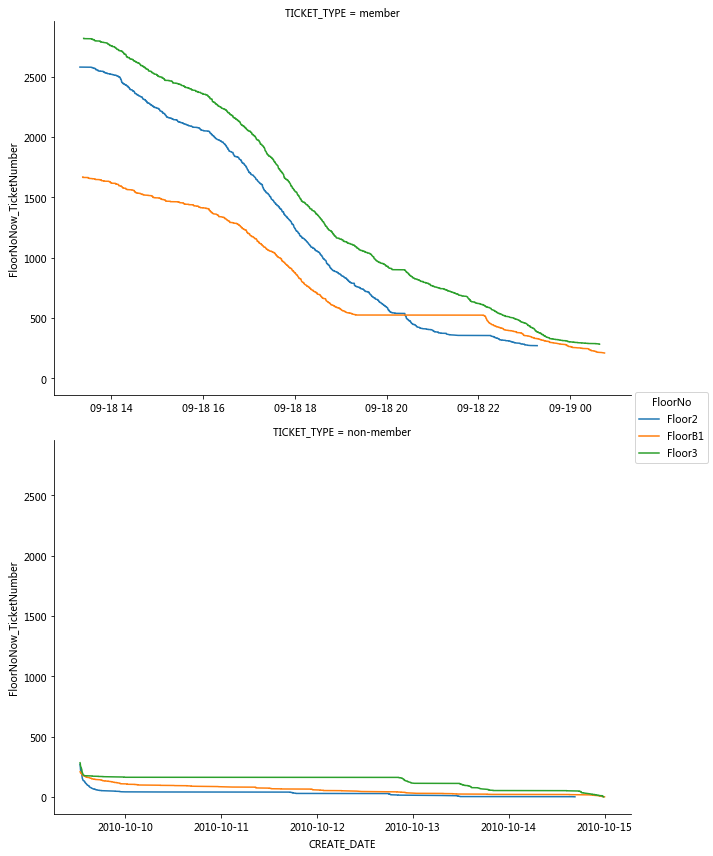

In [20]:
g=sns.FacetGrid(data=df,row="TICKET_TYPE",size=6,aspect=1.5,hue="FloorNo",sharex=False,sharey=True)
g.map(plt.plot,"CREATE_DATE","FloorNoNow_TicketNumber")
g.add_legend()

In [21]:
# 排序後發現System Loading : floor2->floor3 ->floorB1 , but cool situation happen
df.groupby("FloorNo").mean()

,PRICE,SEAT_REGION_NAMENow_TicketNumber,SEAT_REGION_NAMETotal_TicketNumber,SEAT_REGION_NAMETicket_Left(%),FloorNoNow_TicketNumber,FloorNoTotal_TicketNumber,FloorNoTicket_Left(%)
FloorNo,,,,,,,
Floor2,3598.024022,105.282061,210.564122,0.5,1290.0,2580.0,0.5
Floor3,1854.239092,196.456545,392.913090,0.5,1409.0,2818.0,0.5
FloorB1,4000.000000,212.061114,424.122229,0.5,834.0,1668.0,0.5


### 3.3 進一步觀察各層個區域票數販售的狀況（先數值再搭配圖形）

In [22]:
for i in ["member","non-member"]:
    for j in df.Seat_Type.unique():
        f=re.search("Floor.{0,1}[0-9]",j).group()
        observeFloor(i,f,j)

7.87
member,Floor2 Floor2Sectionyellow2B, 共販售 180 張票數
時間： 7.87
平均一小時販售多少張票:22.88

9.74
member,FloorB1 FloorB1FloorSectionA, 共販售 422 張票數
時間： 9.74
平均一小時販售多少張票:43.32

8.2
member,Floor3 Floor3Sectionyellow3F, 共販售 209 張票數
時間： 8.2
平均一小時販售多少張票:25.5

9.95
member,FloorB1 FloorB1FloorSectionC, 共販售 373 張票數
時間： 9.95
平均一小時販售多少張票:37.48

11.22
member,FloorB1 FloorB1FloorSectionD, 共販售 337 張票數
時間： 11.22
平均一小時販售多少張票:30.04

8.75
member,Floor2 Floor2Sectionyellow2C, 共販售 123 張票數
時間： 8.75
平均一小時販售多少張票:14.05

11.16
member,FloorB1 FloorB1FloorSectionB, 共販售 328 張票數
時間： 11.16
平均一小時販售多少張票:29.38

7.06
member,Floor3 Floor3Sectionyellow3E, 共販售 189 張票數
時間： 7.06
平均一小時販售多少張票:26.77

9.5
member,Floor2 Floor2Sectionpurple2C, 共販售 193 張票數
時間： 9.5
平均一小時販售多少張票:20.32

8.67
member,Floor3 Floor3Sectionyellow3D, 共販售 445 張票數
時間： 8.67
平均一小時販售多少張票:51.34

8.61
member,Floor2 Floor2Sectionpurple2D, 共販售 142 張票數
時間： 8.61
平均一小時販售多少張票:16.49

9.36
member,Floor2 Floor2Sectionpurple2E, 共販售 240 張票數
時間： 9.36
平均一小時販售多少張票:25.64

9.41
member,Floor

In [23]:
result=pd.DataFrame(data,columns=["MType","FloorNo","Ticket_SaleNum","Sale_Period","Loading_Efficiency"])
result.set_index(["MType","FloorNo"],inplace=True)

In [24]:
result1=pd.DataFrame(data1,columns=["MType","FloorNo","Seat_Type","Ticket_SaleNum (Tickets)","Sale_Period(HR)","Loading_Efficiency (Tickets/HR)"])
result1=result1.set_index(["MType","FloorNo","Seat_Type"]).sort_index()

In [25]:
result1.xs("member").sort_values("Loading_Efficiency (Tickets/HR)",ascending=False)

Ticket_SaleNum (Tickets)  Sale_Period(HR)  \
FloorNo Seat_Type                                                          
Floor3  Floor3Sectionyellow3G                       454             8.49   
        Floor3Sectionyellow3D                       445             8.67   
        Floor3Sectionyellow3C                       475             9.99   
        Floor3Sectionyellow3H                       440             9.55   
FloorB1 FloorB1FloorSectionA                        422             9.74   
        FloorB1FloorSectionC                        373             9.95   
        FloorB1FloorSectionD                        337            11.22   
        FloorB1FloorSectionB                        328            11.16   
Floor2  Floor2Sectionred2E                          242             8.95   
Floor3  Floor3Sectionyellow3E                       189             7.06   
Floor2  Floor2Sectionpurple2E                       240             9.36   
Floor3  Floor3Sectionyellow3F                       209             8.20   
Floor2  Floor2Sectionyellow2E                       231             9.16   
        Floor2Sectionyellow2D                       211             8.55   
        Floor2Sectionyellow2B                       180             7.87   
        Floor2Sectionred2C                          213             9.46   
        Floor2Sectionyellow2A                       171             7.61   
        Floor2Sectionpurple2C                       193             9.50   
Floor3  Floor3Sectionyellow3I                       135             7.02   
Floor2  Floor2Sectionred2D                          126             6.75   
Floor3  Floor3Sectionyellow3B                       118             7.13   
Floor2  Floor2Sectionpurple2D                       142             8.61   
        Floor2Sectionyellow2C                       123             8.75   
        Floor2Sectionpurple2B                       131             9.41   
        Floor2Sectionred2B                          108             8.69   
Floor3  Floor3Sectionyellow3A                        32             6.22   
        Floor3Sectionyellow3J                        39             8.41   

                               Loading_Efficiency (Tickets/HR)  
FloorNo Seat_Type                                               
Floor3  Floor3Sectionyellow3G                            53.44  
        Floor3Sectionyellow3D                            51.34  
        Floor3Sectionyellow3C                            47.55  
        Floor3Sectionyellow3H                            46.05  
FloorB1 FloorB1FloorSectionA                             43.32  
        FloorB1FloorSectionC                             37.48  
        FloorB1FloorSectionD                             30.04  
        FloorB1FloorSectionB                             29.38  
Floor2  Floor2Sectionred2E                               27.04  
Floor3  Floor3Sectionyellow3E                            26.77  
Floor2  Floor2Sectionpurple2E                            25.64  
Floor3  Floor3Sectionyellow3F                            25.50  
Floor2  Floor2Sectionyellow2E                            25.23  
        Floor2Sectionyellow2D                            24.69  
        Floor2Sectionyellow2B                            22.88  
        Floor2Sectionred2C                               22.52  
        Floor2Sectionyellow2A                            22.46  
        Floor2Sectionpurple2C                            20.32  
Floor3  Floor3Sectionyellow3I                            19.24  
Floor2  Floor2Sectionred2D                               18.67  
Floor3  Floor3Sectionyellow3B                            16.54  
Floor2  Floor2Sectionpurple2D                            16.49  
        Floor2Sectionyellow2C                            14.05  
        Floor2Sectionpurple2B                            13.93  
        Floor2Sectionred2B                               12.42  
Floor3  Floor3Sectionyellow3A                             5.15  
      

In [26]:
result1.xs("non-member").sort_values("Loading_Efficiency (Tickets/HR)",ascending=False)

Ticket_SaleNum (Tickets)  Sale_Period(HR)  \
FloorNo Seat_Type                                                          
Floor3  Floor3Sectionyellow3D                        14             0.41   
Floor2  Floor2Sectionyellow2A                        13             0.78   
        Floor2Sectionyellow2D                        14             1.04   
Floor3  Floor3Sectionyellow3F                         3             0.29   
FloorB1 FloorB1FloorSectionA                         88            11.25   
        FloorB1FloorSectionB                         76            10.55   
Floor2  Floor2Sectionyellow2E                        16             2.35   
Floor3  Floor3Sectionyellow3B                        69            10.99   
        Floor3Sectionyellow3I                        56            10.19   
        Floor3Sectionyellow3H                        46             8.92   
        Floor3Sectionyellow3G                        60            11.70   
Floor2  Floor2Sectionpurple2B                        11             2.27   
        Floor2Sectionyellow2B                        19             3.94   
        Floor2Sectionpurple2C                        20             4.74   
        Floor2Sectionred2D                           24             5.99   
        Floor2Sectionpurple2E                        30             7.57   
        Floor2Sectionpurple2D                        12             3.06   
FloorB1 FloorB1FloorSectionC                         29             8.35   
Floor2  Floor2Sectionyellow2C                        17             5.39   
        Floor2Sectionred2E                           55            22.64   
Floor3  Floor3Sectionyellow3C                        18             8.56   
Floor2  Floor2Sectionred2B                           29            22.75   
        Floor2Sectionred2C                           10            10.20   
Floor3  Floor3Sectionyellow3J                         9            10.35   
FloorB1 FloorB1FloorSectionD                         16            20.68   
Floor3  Floor3Sectionyellow3A                         7            10.58   
        Floor3Sectionyellow3E                         1             0.00   

                               Loading_Efficiency (Tickets/HR)  
FloorNo Seat_Type                                               
Floor3  Floor3Sectionyellow3D                            34.05  
Floor2  Floor2Sectionyellow2A                            16.58  
        Floor2Sectionyellow2D                            13.45  
Floor3  Floor3Sectionyellow3F                            10.31  
FloorB1 FloorB1FloorSectionA                              7.82  
        FloorB1FloorSectionB                              7.20  
Floor2  Floor2Sectionyellow2E                             6.80  
Floor3  Floor3Sectionyellow3B                             6.28  
        Floor3Sectionyellow3I                             5.49  
        Floor3Sectionyellow3H                             5.16  
        Floor3Sectionyellow3G                             5.13  
Floor2  Floor2Sectionpurple2B                             4.85  
        Floor2Sectionyellow2B                             4.82  
        Floor2Sectionpurple2C                             4.22  
        Floor2Sectionred2D                                4.01  
        Floor2Sectionpurple2E                             3.96  
        Floor2Sectionpurple2D                             3.92  
FloorB1 FloorB1FloorSectionC                              3.47  
Floor2  Floor2Sectionyellow2C                             3.15  
        Floor2Sectionred2E                                2.43  
Floor3  Floor3Sectionyellow3C                             2.10  
Floor2  Floor2Sectionred2B                                1.27  
        Floor2Sectionred2C                                0.98  
Floor3  Floor3Sectionyellow3J                             0.87  
FloorB1 FloorB1FloorSectionD                              0.77  
Floor3  Floor3Sectionyellow3A                             0.66  
      

In [27]:
excel=pd.ExcelWriter("Result.xlsx")
result.to_excel(excel,"FloorNo",encoding="utf-8-sig")
result1.to_excel(excel,"FloorNo_SeatType",encoding="utf-8-sig")

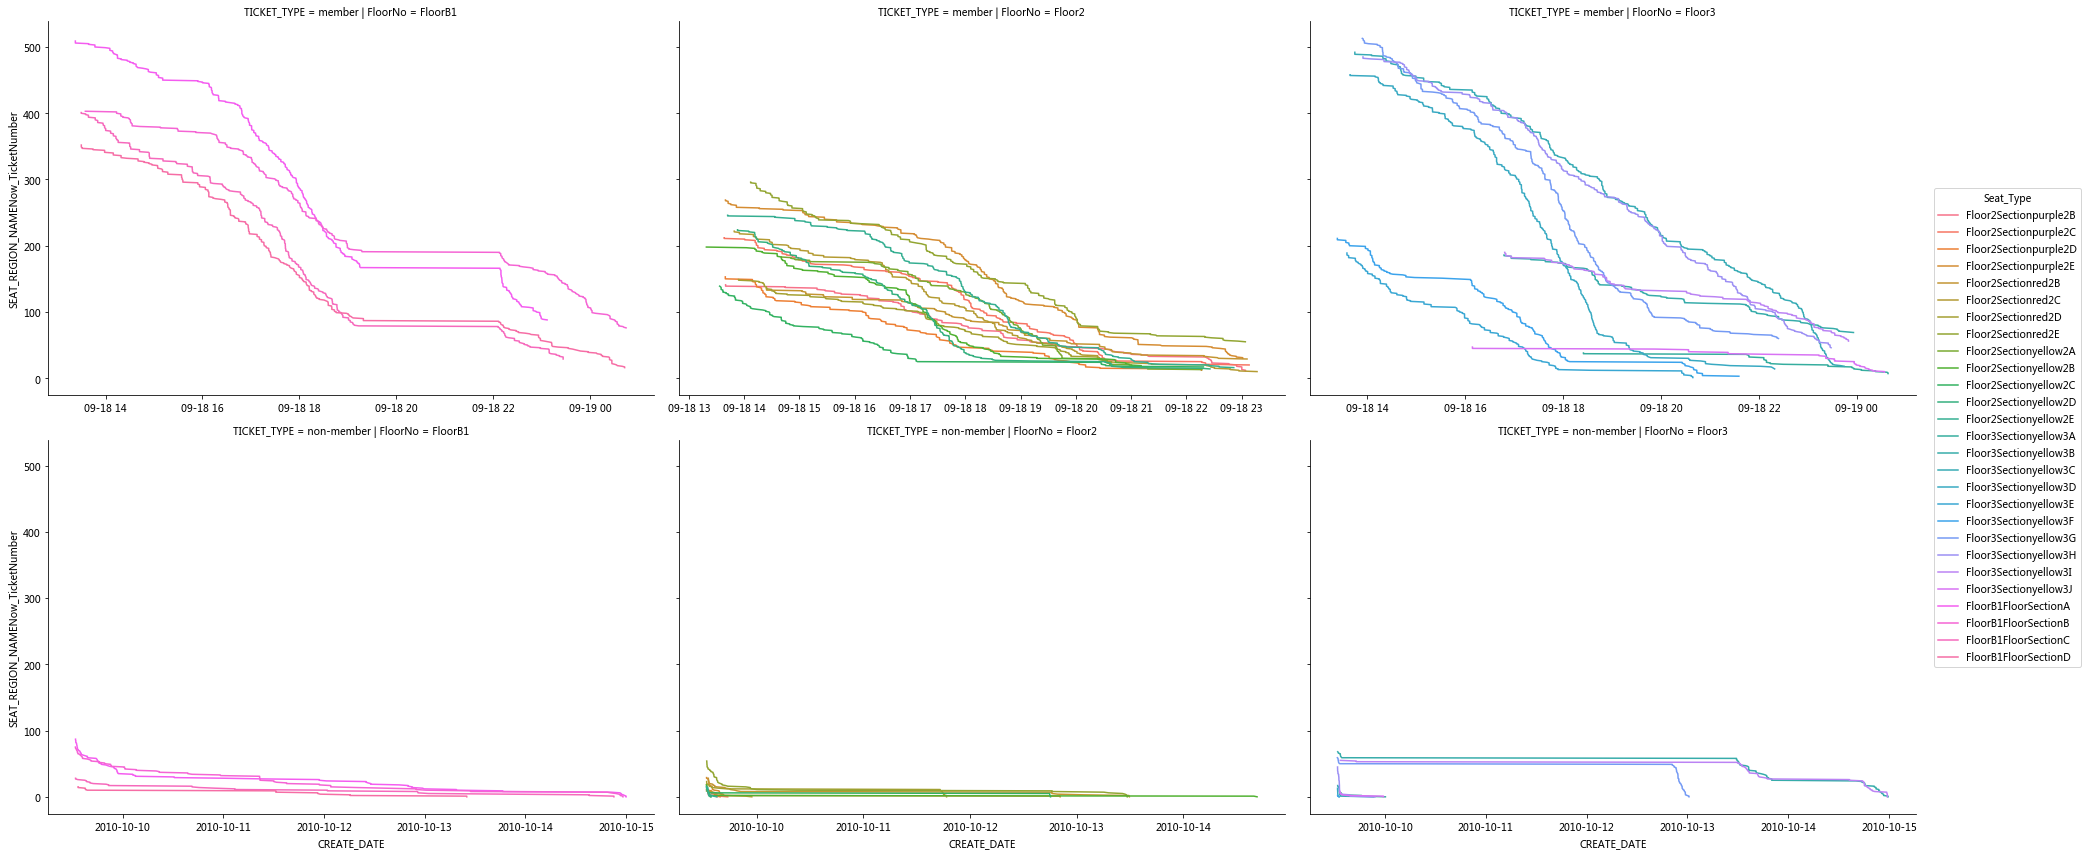

In [28]:
# 先看 member 與 非 member   
g=sns.FacetGrid(data=df,row="TICKET_TYPE",col="FloorNo",size=6,aspect=1.5,hue="Seat_Type",col_order=["FloorB1","Floor2","Floor3"],sharex=False,sharey=True)
g.map(plt.plot,"CREATE_DATE","SEAT_REGION_NAMENow_TicketNumber")
g.add_legend()

# 4 參考. 各樓層的比較，各區域的比較

In [29]:
left="Ticket_Left(%)"

In [30]:
floorB1=df["FloorNo"].str.contains("FloorB1")
floor2=df["FloorNo"].str.contains("Floor2")
floor3=df["FloorNo"].str.contains("Floor3")

# B1

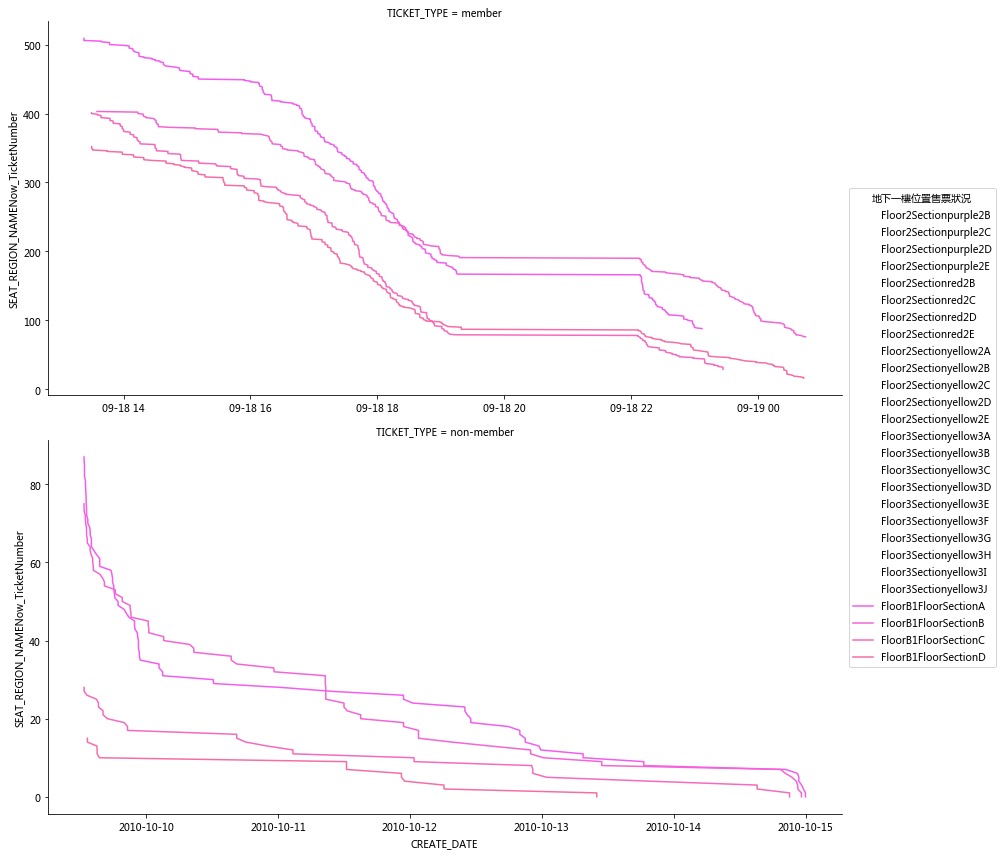

In [31]:
g=sns.FacetGrid(data=df[floorB1],size=6,row="TICKET_TYPE",aspect=2,hue="Seat_Type",sharex=False,sharey=False)
g.map(plt.plot,"CREATE_DATE","SEAT_REGION_NAMENow_TicketNumber")
g.add_legend(title="地下一樓位置售票狀況")
#g.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# Floor 2

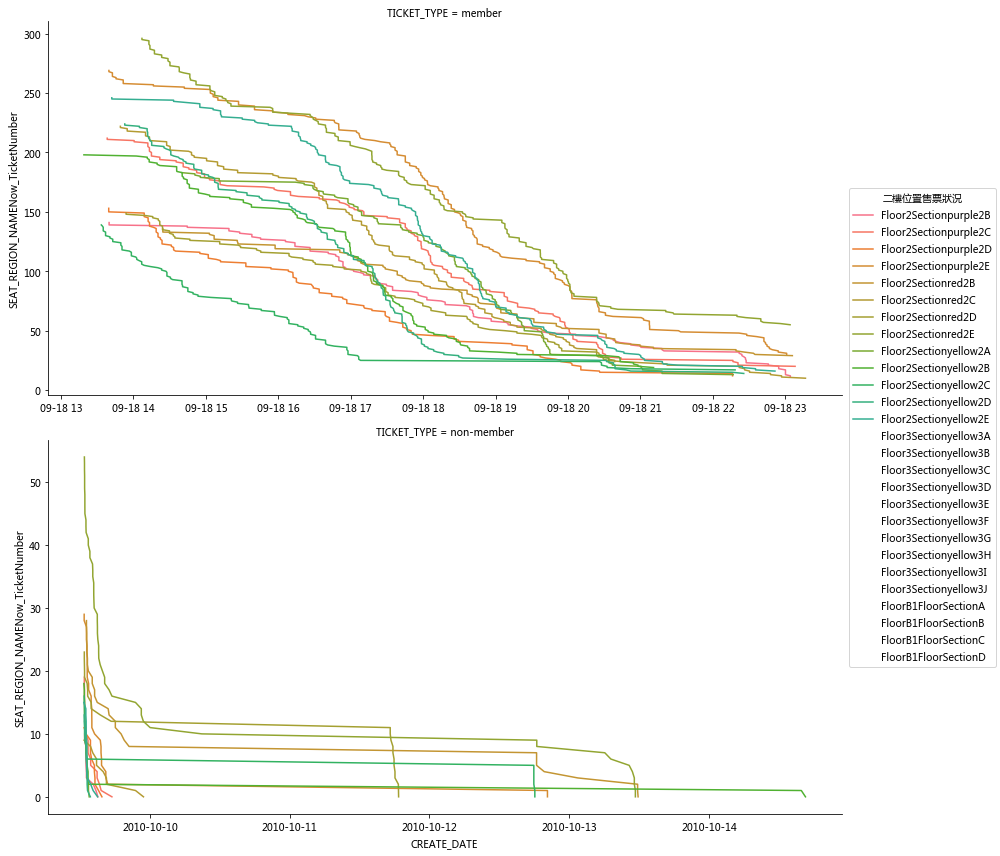

In [32]:
g=sns.FacetGrid(data=df[floor2],size=6,row="TICKET_TYPE",aspect=2,hue="Seat_Type",sharex=False,sharey=False)
g.map(plt.plot,"CREATE_DATE","SEAT_REGION_NAMENow_TicketNumber")
g.add_legend(title="二樓位置售票狀況")

# Floor 3

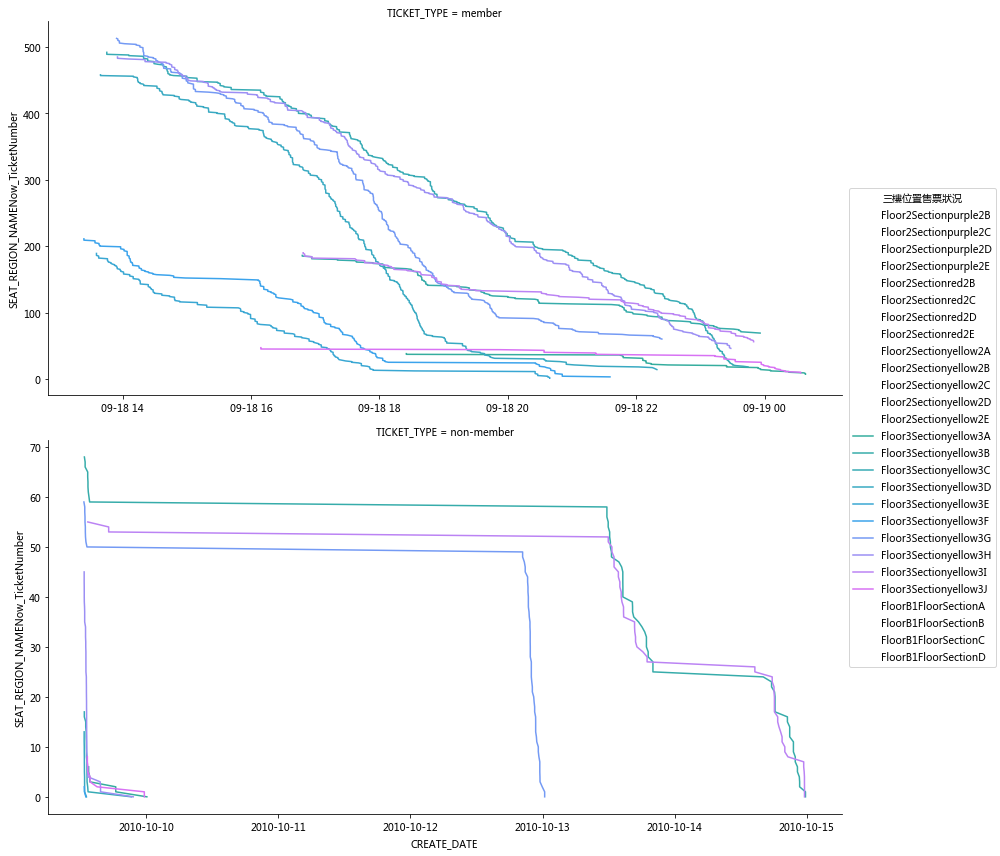

In [33]:
g=sns.FacetGrid(data=df[floor3],size=6,row="TICKET_TYPE",aspect=2,hue="Seat_Type",sharex=False,sharey=False)
g.map(plt.plot,"CREATE_DATE","SEAT_REGION_NAMENow_TicketNumber")
g.add_legend(title="三樓位置售票狀況")

In [34]:
pd.options.display.max_rows=60

In [50]:
df.set_index("CREATE_DATE",inplace=True)

In [6]:
df[["IDENTITY","CREATE_DATE"]].nunique()

IDENTITY       2724
CREATE_DATE    3159
dtype: int64

In [72]:
(df[df["TICKET_TYPE"]=="member"].reset_index()["CREATE_DATE"].max()-df[df["TICKET_TYPE"]=="member"].reset_index()["CREATE_DATE"].min()).seconds/3600


11.430833333333334

In [ ]:
2421 / 11.25 = 

In [62]:
df.truncate(before="2010-09-18", after="2010-09-21").reset_index()["IDENTITY"].nunique()

2421

In [77]:
(df[df["TICKET_TYPE"]=="non-member"].reset_index()["CREATE_DATE"].max()-df[df["TICKET_TYPE"]=="non-member"].reset_index()["CREATE_DATE"].min()).seconds/3600

11.343333333333334

In [76]:
df.truncate(before="2010-10-8", after="2010-10-31").reset_index()["IDENTITY"].nunique()

438

In [ ]:
# 135人重複